In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from math import pi
from numpy import arctan

In [2]:
N=200
x_start,x_end=-4.,4.
y_start,y_end=-2.,2.
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

In [3]:
u_inf=1.
u_freestream=u_inf*numpy.ones((N,N),dtype=float)
v_freestream=numpy.zeros((N,N),dtype=float)
psi_freestream=u_inf*Y

In [4]:
def get_velocity(strength,xs,ys,X,Y):
    u=strength/(2*pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v=strength/(2*pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

In [5]:
def get_stream_function(strength,xs,ys,X,Y):
    psi=strength/(2*pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi

In [6]:
strength_source=5.
x_source,y_source=-1.,0.
u_source,v_source=get_velocity(strength_source,x_source,y_source,X,Y)
psi_source=get_stream_function(strength_source,x_source,y_source,X,Y)

C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


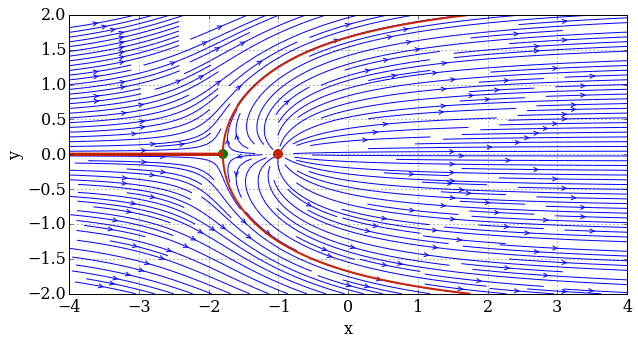

In [7]:
u=u_freestream+u_source
v=v_freestream+v_source
psi=psi_freestream+psi_source

size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(x_source,y_source,color='#CD2305',s=80,marker='o')

x_stagnation=x_source-strength_source/(2*pi*u_inf)
y_stagnation=y_source

pyplot.scatter(x_stagnation,y_stagnation,color='g',s=80,marker='o')

pyplot.contour(X,Y,psi,levels=[-strength_source/2, +strength_source/2],colors='#CD2305',linewidths=2,linestyles='solid');

In [8]:
strength_sink=-5.
x_sink,y_sink=1.,0.
u_sink,v_sink=get_velocity(strength_sink,x_sink,y_sink,X,Y)
psi_sink=get_stream_function(strength_sink,x_sink,y_sink,X,Y)

C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


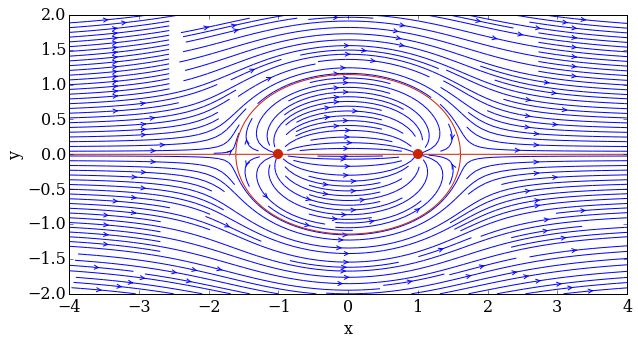

In [9]:
u=u_freestream+u_source+u_sink
v=v_freestream+v_source+v_sink
psi=psi_freestream+psi_source+psi_sink

size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter([x_source,x_sink],[y_source,y_sink],color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidth=2,linestyles='solid');

C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


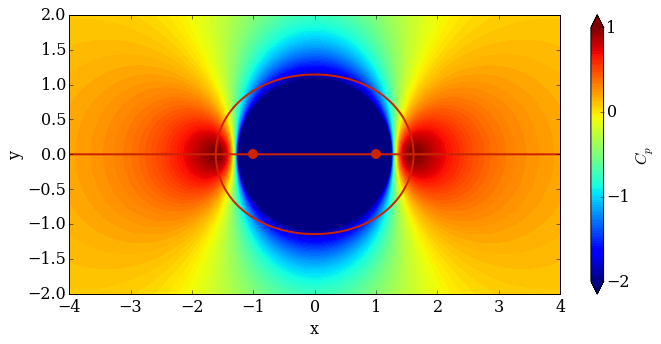

In [10]:
cp=1.-(u**2+v**2)/u_inf**2

size=10
pyplot.figure(figsize=(1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf=pyplot.contourf(X,Y,cp,levels=numpy.linspace(-2.,1.,100),extend='both')
cbar=pyplot.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-2.,-1.,0.,1.])
pyplot.scatter([x_source,x_sink],[y_source,y_sink],color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid');